In [1]:
f = open("../api_key.txt", "r")
api_key = f.readline()

In [91]:
import requests
import json
from os.path import exists
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
def grab_daily_data(company_label, api_key):
    file_path = "../data/" + company_label + ".json"
    if exists(file_path):
        f = open(file_path)
        return json.load(f)
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + company_label + "&outputsize=full&apikey=" + api_key
    r = requests.get(url)
    data = r.json()
    with open("../data/" + company_label + ".json", "w") as output_file:
        json.dump(data, output_file)
    return data

In [166]:
def get_closing_price(target):
    if isinstance(target, str):
        target = grab_daily_data(target, api_key)
    time_series = []
    stock_prices = []
    for day in target['Time Series (Daily)']:
        time_series.append(day)
        stock_prices.append(target['Time Series (Daily)'][day]['4. close'])
    time_series = np.flip(pd.to_datetime(time_series))
    stock_prices = np.flip(np.array(stock_prices).astype(float))
    return time_series, stock_prices

In [167]:
def plot_close_prices(target):
    time_series, stock_prices = get_closing_price(target)
    fig, ax = plt.subplots()
    ax.plot(time_series, stock_prices)

In [168]:
def preprocess_data(target):
    time_series, stock_prices = get_closing_price(target)
    x = []
    y = []
    for i in range(0, len(time_series) - 369):
        x.append(stock_prices[0 + i:365+i])
        y.append(sum(stock_prices[365+i: 370+i]) / 5)
    return x, y

In [178]:
def predict_and_save(symbol, model):
    x, y = preprocess_data(symbol)
    pred = model.predict(np.asarray(x))
    plt.plot(y)
    plt.plot(pred)
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()
    my_dict = {str(i): str(pred[i][0]) for i in range(0, len(pred))}
    with open("../data/" + symbol + "_pred.json", "w") as output_file:
        json.dump(my_dict, output_file)

In [169]:
x, y = preprocess_data("IBM")

In [170]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(365,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(loss='mean_absolute_error',
              metrics=[tf.keras.metrics.MeanSquaredError()],
              optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(np.asarray(x), np.asarray(y), batch_size=32, verbose='0', epochs=30)

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


169/169 [==============================] - 0s 1ms/step


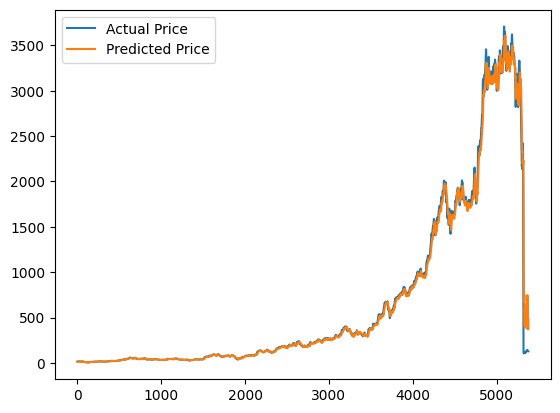

In [181]:
predict_and_save("AMZN", model)

In [1]:
from data_manager import grab_daily_data, get_stock_data, preprocess_data

In [2]:
help(get_stock_data)

Help on function get_stock_data in module data_manager:

get_stock_data(target, api_key, ohcl='4. close')
    Fetches the stock data of a specified target company to a dictionary.
    data['Dates'] stores the dates (e.g. ['2022-09-06', ...]) and
    data['Prices'] stores corresponding stock prices (e.g. [167.0, ...]).
    They are sorted in chronological order.
    Optional keyword argument ohcl represents open, high, low, or close
    daily prices.



In [4]:
x, y, time_series = preprocess_data("IBM", api_key)
print(y)

[102.724, 106.45, 109.5, 112.09400000000001, 113.76400000000001, 113.61800000000001, 113.89200000000001, 114.52000000000001, 115.68799999999999, 115.798, 115.79, 115.72200000000001, 115.874, 115.71200000000002, 116.02799999999999, 116.328, 115.518, 114.85, 114.026, 113.78999999999999, 113.76399999999998, 114.89000000000001, 116.18599999999999, 117.072, 117.39200000000001, 118.298, 118.37, 117.61600000000001, 116.54400000000001, 115.42399999999998, 114.08200000000002, 113.25, 113.58999999999999, 114.55999999999999, 115.65, 116.292, 117.03600000000002, 117.09200000000001, 116.9, 116.6, 116.1, 115.482, 115.0, 114.31000000000002, 113.68000000000002, 113.53400000000002, 113.21, 112.85, 112.936, 113.43599999999999, 113.56199999999998, 113.902, 113.89000000000001, 113.606, 111.886, 110.13, 107.652, 105.826, 104.856, 105.26199999999999, 105.88200000000002, 107.196, 107.282, 106.63199999999999, 106.066, 105.672, 104.86800000000001, 104.98999999999998, 105.39000000000001, 105.19000000000001, 105